# Function Definitions

In [18]:
import numpy as np
from scipy.integrate import odeint
from statistics import mean
import matplotlib.pyplot as plt

def approx (num, rel, tol, cmpr) :
	# Check if num is lower than relative
	if cmpr == -1 :
		return (rel - num)/np.abs(rel) <= tol

	# Check absolute difference to relative
	if cmpr == 0 :
		return np.abs(num - rel)/np.abs(rel) <= tol

	# Check if num is higher than relative
	if cmpr == 1 :
		return (num - rel)/np.abs(rel) <= tol

x_min = 0
minimas = []
maximas = []

def obj (x) :
    global x_min
    global minimas
    global maximas
    # objective 1  [x^2] ---> x_min = 0, f(x_min) = 0
    # x_min = 0
    # return np.square (x)
    
    # objective 2 [x^4 + x^3 - 10x^2 + x + 5] ---> x_min = -2.6629, f(x_min) = -37.1732
    # x_min = -2.6629,
    # return np.power(x, 4) + np.power(x, 3) - 10*np.square(x) + x + 5
    
    # objective 3 [0.025*x^2 + sin(x)] ---> x_min = 1.49593, f(x_min) = -0.94125366117
    x_min = -1.49593
    minimas = [-19.1433, -13.4028, -7.47114, 4.48616, 10.446, 16.324]
    maximas = [-18.4538, -11.6152, -4.96317, 1.65357, 8.28087, 14.984]
    return 0.025*np.square(x) + np.sin(x)

def objDer (x) :
	# Objective 1
	# return 2*x

	# Objective 2
	# return 4*np.pow(x,3) + 3*np.pow(x,2) - 20*np.pow(x) + 1

	# Objective 3
	return 0.05*x + np.cos(x)

# PSO Loop with Diagnostic Plots

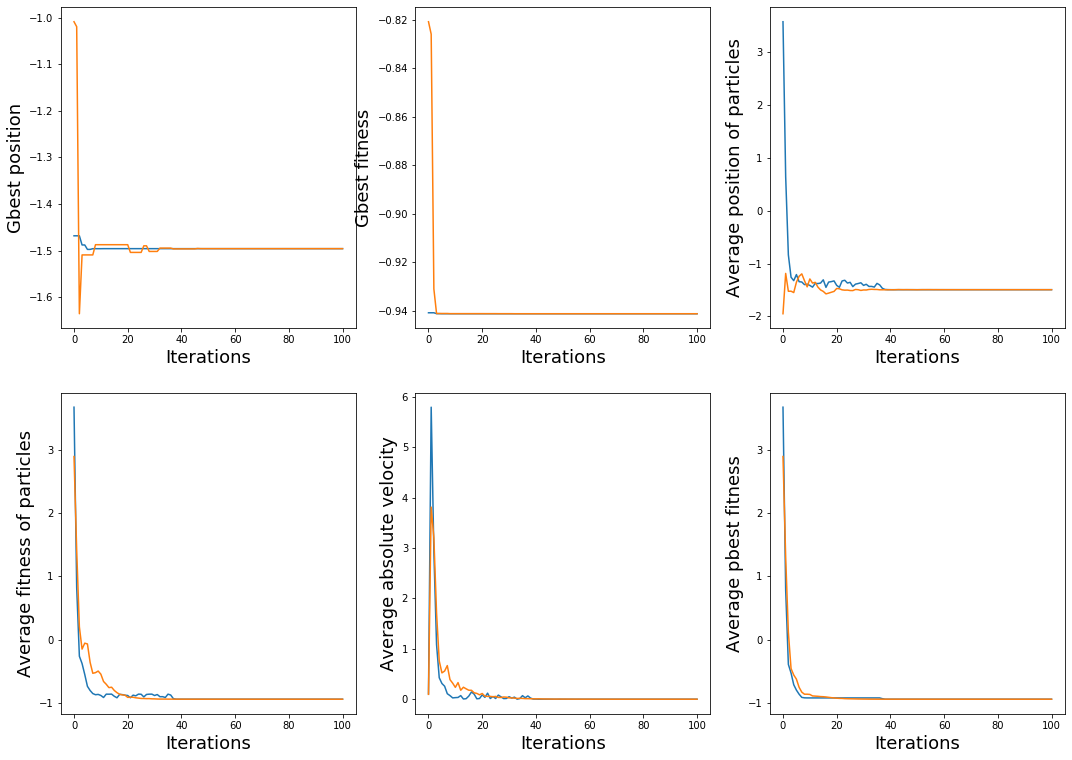

In [19]:
Nx = 25
w = 0.1
c1 = 0.8
c2 = 0.9
beta = 0.9

left = -20 
right = 20
intervalLength = right - left

xVan = intervalLength * np.random.rand(Nx, 1) - intervalLength/2
vVan = intervalLength/100.0 * np.random.rand(Nx, 1) - intervalLength/(2*100)
xMom = intervalLength * np.random.rand(Nx, 1) - intervalLength/2
vMom = intervalLength/100.0 * np.random.rand(Nx, 1) - intervalLength/(2*100)
momvec = np.zeros(shape = (Nx, 1))
pbestVan = xVan
pbestMom = xMom

numIter = 100
gbestVan = min (xVan , key = lambda x : obj(x))
gbestMom = min (xMom , key = lambda x : obj(x))

################################################################################################
# Plot 1 list -----------------> Gbest point per iteration
gbvCache = [gbestVan]
gbmCache = [gbestMom]

# Plot 2 list -----------------> Gbest point objective value per iteration
gbvoCache = [obj(gbestVan)]
gbmoCache = [obj(gbestMom)]

# Plot 3 list -----------------> Average of points 
xavgvCache = [np.average (xVan)]
xavgmCache = [np.average (xMom)]

# Plot 4 list -----------------> Average of fitness
xoavgvCache = [np.average (obj(xVan))]
xoavgmCache = [np.average (obj(xMom))]

# Plot 5 list -----------------> Average of absolute velocity
vavgvCache = [np.average (abs(vVan))]
vavgmCache = [np.average (abs(vMom))]

# Plot 6 list -----------------> Average of pbest fitness
pbavgvCache = [np.average (obj(pbestVan))]
pbavgmCache = [np.average (obj(pbestMom))]
################################################################################################

# Vanilla particles history
xvanCache = [xVan]

# Chaotic particles history
xmomCache = [xMom]

################################################################################################
for i in range (0, numIter) :
    r1 = np.random.rand (Nx, 1)
    r2 = np.random.rand (Nx, 1)
    r1m = np.random.rand (Nx, 1)
    r2m = np.random.rand (Nx, 1)
    
    vVan = w*vVan + c1*r1*(pbestVan - xVan) + c2*r2*(gbestVan - xVan)
    xVan = xVan + vVan
    
    momvec = beta*momvec + (1 - beta)*vMom
    vMom = momvec + c1*r1m*(pbestMom - xMom) + c2*r2m*(gbestMom - xMom)
    xMom = xMom + vMom
    
    less = obj(xVan) < obj(pbestVan)
    pbestVan = less * xVan + np.invert (less) * pbestVan
    
    less = obj(xMom) < obj(pbestMom)
    pbestMom = less * xMom + np.invert (less) * pbestMom
    
    ################################################################################################
    gbestVanNew = min (xVan , key = lambda x : obj(x))
    if (obj(gbestVanNew) < obj(gbestVan)) :
        gbestVan = gbestVanNew
        
    gbestMomNew = min (xMom , key = lambda x : obj(x))
    if (obj(gbestMomNew) < obj(gbestMom)) :
        gbestMom = gbestMomNew
    
    # Appending to list for plot 1
    gbvCache.append (gbestVan)
    gbmCache.append (gbestMom)
    
    # Appending to list for plot 2
    gbvoCache.append (obj(gbestVan))
    gbmoCache.append (obj(gbestMom))
    
    # Appending to list for plot 3
    xavgvCache.append (np.average (xVan))
    xavgmCache.append (np.average (xMom))
    
    # Appending to list for plot 4
    xoavgvCache.append (np.average (obj(xVan)))
    xoavgmCache.append (np.average (obj(xMom)))
    
    # Appending to list for plot 5
    vavgvCache.append (np.average (abs(vVan)))
    vavgmCache.append (np.average (abs(vMom)))
    
    # Appending to list for plot 6
    pbavgvCache.append (np.average (obj(pbestVan)))
    pbavgmCache.append (np.average (obj(pbestMom)))
    ################################################################################################
    
    # Vanilla particles history
    xvanCache.append(xVan)

    # Chaotic particles history
    xmomCache.append(xMom)
    
    ################################################################################################
    

plt.figure(figsize = (18, 13))

# Plot 1 ---> Global best position vs. Iterations 
plt.subplot (2,3,1)
plt.plot (np.arange (numIter + 1), gbvCache)
plt.plot (np.arange (numIter + 1), gbmCache)
plt.ylabel ('Gbest position', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 2 ---> Global best fitness vs. Iterations 
plt.subplot (2,3,2)
plt.plot (np.arange (numIter + 1), gbvoCache)
plt.plot (np.arange (numIter + 1), gbmoCache)
plt.ylabel ('Gbest fitness', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 3 ---> Average absolute velocity vs. Iterations 
plt.subplot (2,3,3)
plt.plot (np.arange (numIter + 1), xavgvCache)
plt.plot (np.arange (numIter + 1), xavgmCache)
plt.ylabel ('Average position of particles', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 4 ---> Average fitness vs. Iterations 
plt.subplot (2,3,4)
plt.plot (np.arange (numIter + 1), xoavgvCache)
plt.plot (np.arange (numIter + 1), xoavgmCache)
plt.ylabel ('Average fitness of particles', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 5 ---> Average absolute velocity vs. Iterations 
plt.subplot (2,3,5)
plt.plot (np.arange (numIter + 1), vavgvCache)
plt.plot (np.arange (numIter + 1), vavgmCache)
plt.ylabel ('Average absolute velocity', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 6 ---> Average pbest fitness vs. Iterations 
plt.subplot (2,3,6)
plt.plot (np.arange (numIter + 1), pbavgvCache)
plt.plot (np.arange (numIter + 1), pbavgmCache)
plt.ylabel ('Average pbest fitness', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

plt.show ()

# Final Particle Distribution

Vanilla correct for gbestVan = [-1.49592992]
Momentum correct for gbestChaos = [-1.49592979]
Same gbest
cntVan = 25
cntChaos = 25
Vanilla Final Average fitness = -0.9412536611746631
Momentum Final Average fitness = -0.9412536611324117


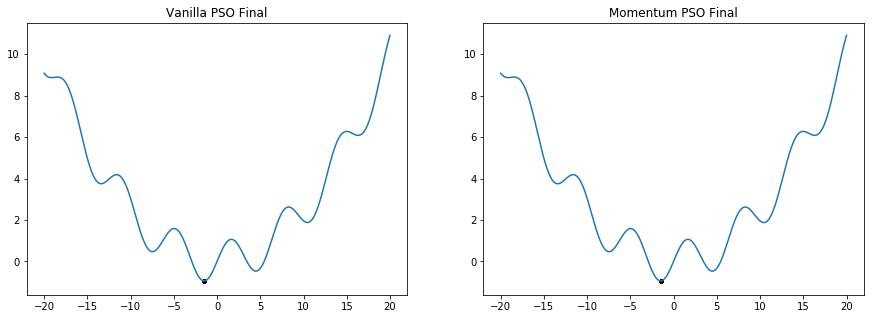

In [20]:
globMinVan = approx (xVan, gbestVan, 0.1, 0)
cntVan = sum (globMinVan)[0]
corrVan = xVan[globMinVan]
otherVan = xVan[np.invert(globMinVan)]
otherVanDer = np.array (list (zip (otherVan, objDer(otherVan))))

globMinMom = approx (xMom, gbestMom, 0.1, 0)
cntMom = sum (globMinMom)[0]
corrMom = xMom[globMinMom]
otherMom = xMom[np.invert(globMinMom)]

if approx (gbestVan, x_min, 0.1, 0)[0] :
    currMinVan = True
else :
    currMinVan = False
if approx (gbestMom, x_min, 0.1, 0)[0] :
    currMinMom = True
else :
    currMinMom = False
    
import matplotlib.pyplot as plt
dotsize = 10

print ("Vanilla correct for gbestVan = " + str(gbestVan))
print ("Momentum correct for gbestChaos = " + str(gbestMom))
if approx(gbestVan, gbestMom, 0.1, 0) :
    pass
    print ("Same gbest")
else :
    pass
    print ("Different gbest f(" + str(gbestVan[0]) +") = " +str(obj(gbestVan)) + ", f(" + str(gbestMom[0]) +") =" +str(obj(gbestMom)))

print ("cntVan = " + str(cntVan))
print ("cntChaos = " + str(cntMom))
print ("Vanilla Final Average fitness = " + str(xoavgvCache[-1]))
print ("Momentum Final Average fitness = " + str(xoavgmCache[-1]))
    
xaxis = np.linspace (left, right, 1000)
plt.figure(figsize = (15, 5))
plt.subplot (1, 2, 1)
plt.title ("Vanilla PSO Final")
plt.plot (xaxis, obj(xaxis))
plt.scatter (corrVan, obj(corrVan), color='k', s=dotsize)
plt.scatter (otherVan, obj(otherVan), color='r', s=dotsize)

plt.subplot (1, 2, 2)
plt.title ("Momentum PSO Final")
plt.plot (xaxis, obj(xaxis))
plt.scatter (corrMom, obj(corrMom), color='k', s=dotsize)
plt.scatter (otherMom, obj(otherMom), color='r', s=dotsize)

plt.show ()

# PSO Trajectory

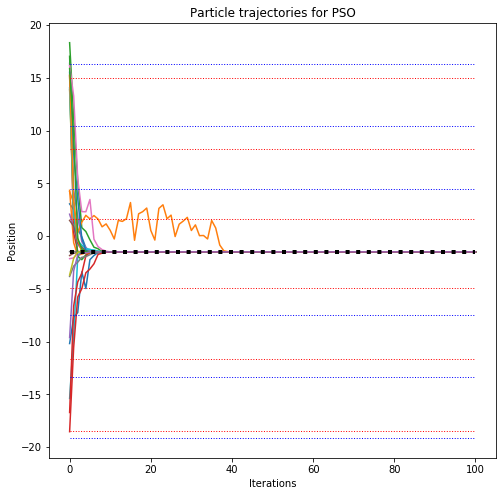

In [21]:
if type(xvanCache) == type([]) :
    xvanCache = np.array (xvanCache)

plt.figure(figsize = (8, 8))
i = 0
while i < Nx :
    plt.plot (np.arange (numIter + 1), xvanCache[:,i], label = "Point " + str(i+1))
    i = i + 1
    
plt.plot (np.arange (numIter + 1), x_min * np.ones (numIter+1), 'k:', linewidth=4)

for minpoint in minimas :
    plt.plot (np.arange (numIter + 1), minpoint * np.ones (numIter+1), 'b:',  linewidth=1)
    
for maxpoint in maximas :
    plt.plot (np.arange (numIter + 1), maxpoint * np.ones (numIter+1), 'r:',  linewidth=1)

plt.title ('Particle trajectories for PSO')
plt.xlabel ('Iterations')
plt.ylabel ('Position')
plt.show ()

# Momentum Trajectory

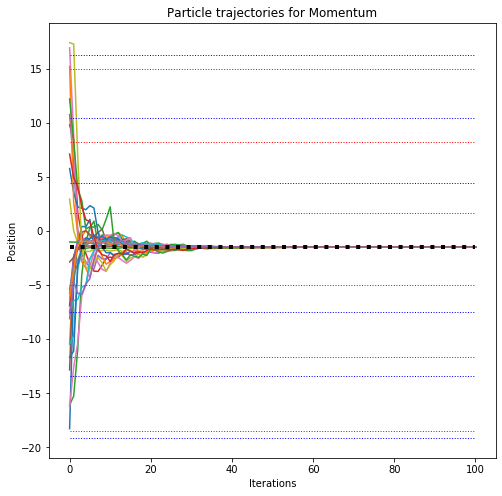

In [22]:
if type(xmomCache) == type([]) :
    xmomCache = np.array (xmomCache)

plt.figure(figsize = (8, 8))
i = 0
while i < Nx :
    plt.plot (np.arange (numIter + 1), xmomCache[:,i], label = "Point " + str(i+1))
    i = i + 1
    
plt.plot (np.arange (numIter + 1), x_min * np.ones (numIter+1), 'k:', linewidth=4)

for minpoint in minimas :
    plt.plot (np.arange (numIter + 1), minpoint * np.ones (numIter+1), 'b:',  linewidth=1)
    
for maxpoint in maximas :
    plt.plot (np.arange (numIter + 1), maxpoint * np.ones (numIter+1), 'r:',  linewidth=1)
    
plt.title ('Particle trajectories for Momentum')
plt.xlabel ('Iterations')
plt.ylabel ('Position')
plt.show ()